In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt

df = pd.read_csv('../../../Cleaned Datasets/emissions_cleaned.csv')

X = df.drop(columns=["Comb CO2"])
y = df["Comb CO2"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Sk-learn implementation

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


model = RandomForestRegressor(n_estimators = 40, max_features = 'sqrt', max_depth = 20, random_state = 42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = mse**.5
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Absolute Error: 4.520977946300551
Mean Squared Error: 45.574133297404664
Root Mean Squared Error: 6.750861670735423
R-squared score: 0.9897233906763112


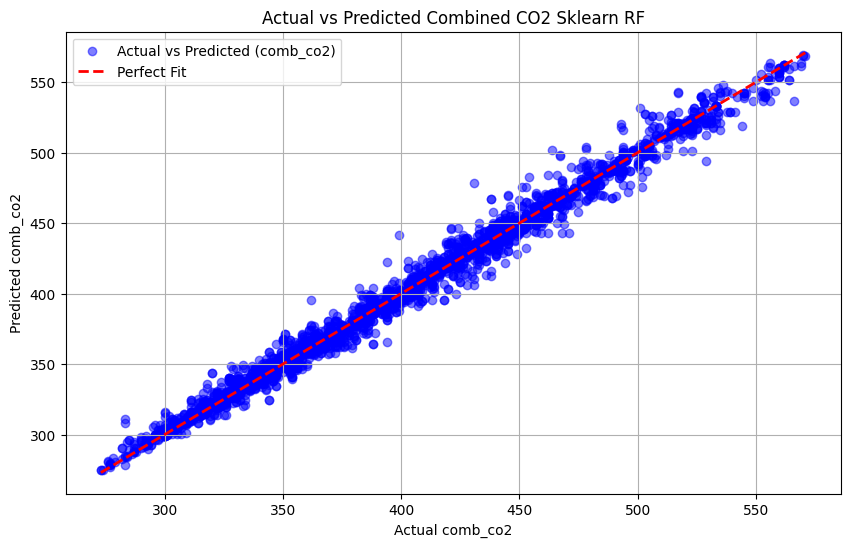

In [3]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted (comb_co2)', alpha=0.5)
plt.plot([y_test.min().min(), y_test.max().max()], [y_test.min().min(), y_test.max().max()], color='red', linestyle='--', lw=2,
         label='Perfect Fit')
plt.xlabel('Actual comb_co2')
plt.ylabel('Predicted comb_co2')
plt.title('Actual vs Predicted Combined CO2 Sklearn RF')
plt.legend()
plt.grid(True)
plt.show()

H2O Implementation

In [4]:
import h2o
from h2o.estimators import H2ORandomForestEstimator


h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 35 mins
H2O_cluster_timezone:,Europe/Dublin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 13 days
H2O_cluster_name:,H2O_from_python_sammamsohail_pl3lr4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.396 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [5]:
frame = h2o.H2OFrame(df)

predictors = ['Displ', 'Trans', 'Drive', 'Fuel', 'Stnd', 'Veh Class', 'Air Pollution Score', 'City MPG']
response = 'Comb CO2'

train, valid = frame.split_frame(ratios=[.7], seed=42)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [6]:

mtries_sqrt = int(math.sqrt(len(predictors)))

df_drf = H2ORandomForestEstimator(ntrees=40, max_depth=20, mtries=mtries_sqrt, seed=42)

df_drf.train(x = predictors, y = response, training_frame = train)

pred = df_drf.predict(valid)

perf = df_drf.model_performance(valid)

print(perf)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
ModelMetricsRegression: drf
** Reported on test data. **

MSE: 67.66532028332391
RMSE: 8.225893281785504
MAE: 4.89317968896197
RMSLE: 0.020860955678496173
Mean Residual Deviance: 67.66532028332391


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=

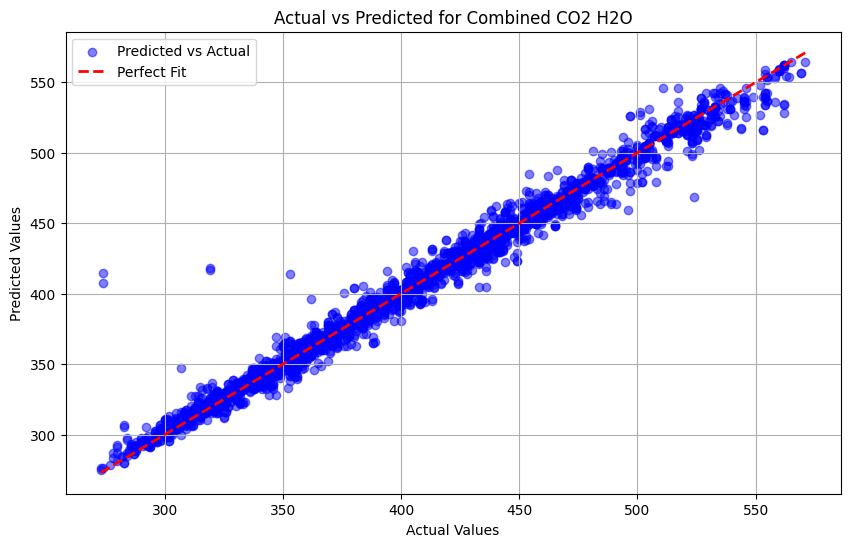

In [7]:

actual = valid[response].as_data_frame()
predicted = pred.as_data_frame()
actual.index = predicted.index


plt.figure(figsize=(10, 6))
plt.scatter(actual, predicted, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=2, label='Perfect Fit', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted for Combined CO2 H2O')
plt.legend()
plt.grid(True)
plt.show()
